In [32]:
import pandas as pd
import re
from datetime import datetime 
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
df = pd.read_csv("../Data/Crimes2001_to_Present.csv")
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11037294,JA371270,03/18/2015 12:00:00 PM,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,...,42.0,32.0,11,NaN,NaN,2015,08/01/2017 03:52:26 PM,NaN,NaN,NaN
1,11646293,JC213749,12/20/2018 03:00:00 PM,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,36.0,19.0,11,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,11645959,JC211511,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,...,33.0,14.0,08A,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
4,11645601,JC212935,06/01/2014 12:01:00 AM,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,21.0,71.0,11,NaN,NaN,2014,04/06/2019 04:04:43 PM,NaN,NaN,NaN


In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8034263 entries, 0 to 8034262
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

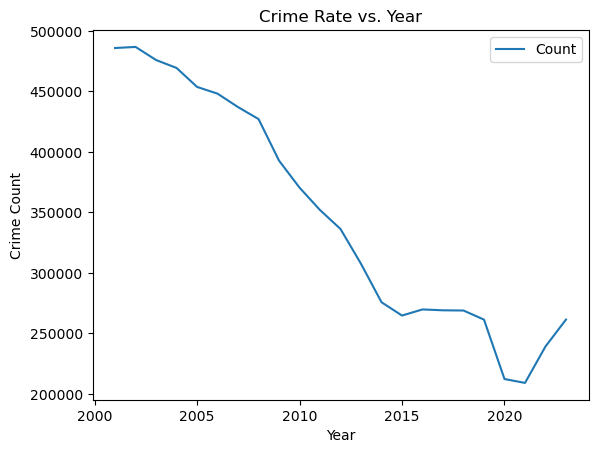

In [21]:
#ignore the last year
crimes_per_year = df.groupby("Year").size().reset_index(name='Count').iloc[0:-1]
crimes_per_year.plot(x = "Year", y = "Count")
plt.title("Crime Rate vs. Year")
plt.xlabel("Year")
plt.ylabel("Crime Count")
plt.show()

In [36]:
# All the different times of crimes
df["Primary Type"].unique()

array(['DECEPTIVE PRACTICE', 'OTHER OFFENSE', 'THEFT', 'BATTERY',
       'ASSAULT', 'WEAPONS VIOLATION', 'INTERFERENCE WITH PUBLIC OFFICER',
       'SEX OFFENSE', 'BURGLARY', 'NARCOTICS', 'LIQUOR LAW VIOLATION',
       'CRIM SEXUAL ASSAULT', 'MOTOR VEHICLE THEFT', 'CRIMINAL DAMAGE',
       'OFFENSE INVOLVING CHILDREN', 'CRIMINAL TRESPASS', 'ROBBERY',
       'PUBLIC PEACE VIOLATION', 'CRIMINAL SEXUAL ASSAULT',
       'PROSTITUTION', 'STALKING', 'HOMICIDE', 'KIDNAPPING', 'ARSON',
       'CONCEALED CARRY LICENSE VIOLATION', 'GAMBLING', 'OBSCENITY',
       'INTIMIDATION', 'OTHER NARCOTIC VIOLATION', 'PUBLIC INDECENCY',
       'NON-CRIMINAL', 'HUMAN TRAFFICKING', 'RITUALISM',
       'DOMESTIC VIOLENCE', 'NON-CRIMINAL (SUBJECT SPECIFIED)',
       'NON - CRIMINAL'], dtype=object)

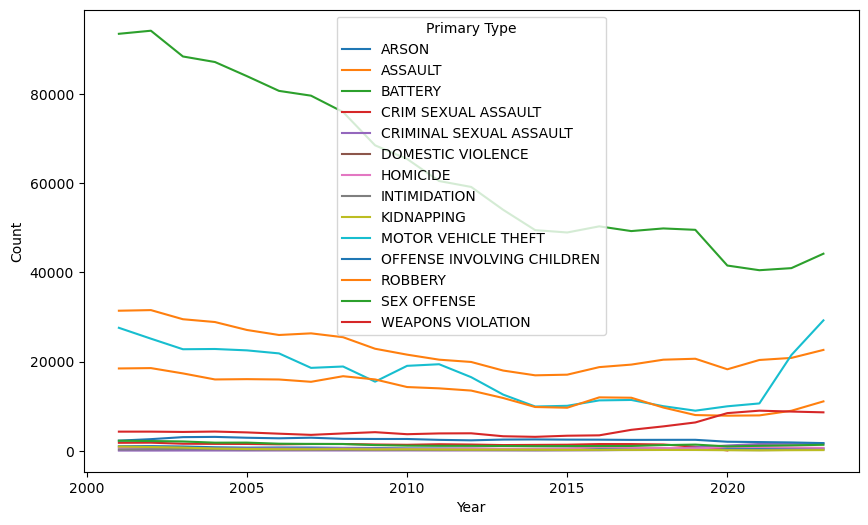

In [44]:
violent_crimes = ['BATTERY', 'ASSAULT', 'WEAPONS VIOLATION', 'SEX OFFENSE', 'CRIM SEXUAL ASSAULT', 'MOTOR VEHICLE THEFT', 'OFFENSE INVOLVING CHILDREN', 'ROBBERY', 'CRIMINAL SEXUAL ASSAULT', 'HOMICIDE', 'KIDNAPPING', 'ARSON', 'INTIMIDATION', 'DOMESTIC VIOLENCE']
df_violent = df[df["Primary Type"].isin(violent_crimes)]

violent_crime_types = df_violent.groupby(["Primary Type", "Year"]).size().reset_index(name = "Count")
violent_crime_types = violent_crime_types[violent_crime_types["Year"] != 2024]
plt.figure(figsize=(10, 6))
sns.lineplot(data= violent_crime_types, x="Year", y="Count", hue="Primary Type", palette="tab10")
plt.legend(title='Primary Type')
plt.show()